In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
plt.figure(figsize=(20,20))
nx.draw(g, with_labels = True)

In [ ]:
import random
E = g.number_of_edges()#initializing random weights
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1
import matplotlib.pyplot as plt
edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]# layout
#pos = nx.spring_layout(G, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
# rendering


In [ ]:
plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

In [ ]:
pip install EoN

In [ ]:
import EoN
gamma =0.2
beta = 1.2
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 20  # intial n° of infected individuals 
R0 = 0
S0 = N - I0 - R0
pos = nx.spring_layout(g)
#nx_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7}
#networkx plotting command.print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,4,1):
    sim.display(time = i)
    
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import mpld3

In [79]:

def plot_engine(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None):
  #returns a subclass of arrays  
  f, ax = plt.subplots(1,1,figsize=(10,4))
  '''
  The following four functions (plot()) draws plot for each of the label as mentioned
  Susceptible
  Exposed
  Infected
  Recovered
  
  First parameter represents the linear space of time over the course of 100 days, 
  
  S to R parameters refer to the output set after solving the ODE, alpha refers to the transparency value of the 
  line plot and linewidth refers to the width of the line 
  
  '''
  ax.plot(t, S, 'g', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
  
  '''
  If dead compartment exists, then we imply the following code to the previous model, thereby improving the model
  to accomodate dead compartment.  
  '''
  
  '''
  In case, if number of people dead is non-zero, the if condition is executed, otherwise the else condition is 
  executed
  '''

  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

  '''
  We set the x-axis to denote time (in days) which can help us interpret the model over a period of time
  '''
    
  ax.set_xlabel('Time (days)')

  '''
  Tick params is used to diagramatical representation of axis divisions
  '''

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  
  '''
  To make a time grid with black lines
  '''
  ax.grid(b=True, which='major', c='black', lw=2, ls='-')
  
  '''
  To describe the legend, with transparency value = 0.9
  '''
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.9)
  '''
  Spines represent the terminals of tick marks with data boundaries
  '''
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();
  if R0 is not None :
    f = plt.figure(figsize=(12,4))
  if R0 is not None:
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'y--', alpha=0.7, linewidth=2, label='R_0')
    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')
    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
    plt.show()

In [77]:
'''

Differential equation for determining the exposure, it calculate the following :

Rate of susceptibility = dS / dT
Rate of exposure = dE / dT
Rate of infection = dI / dT
Rate of recovery = dR / dT

'''

def diff_eq_for_exposure(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    ds_dt = (-beta * I) * (S / N)
    de_dt = (beta * I * (S / N)) - (delta * E)
    di_dt = (delta * E) - (gamma * I)
    dr_dt = (gamma * I)
    
    return ds_dt, de_dt, di_dt, dr_dt

In [24]:
'''
The parameters used here are generic parameters and are not specific to any particular geographical region 
    
'''

N  = 100000
D = 7.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 1.98
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N - 1, 1, 0, 0  # initial conditions: one exposed

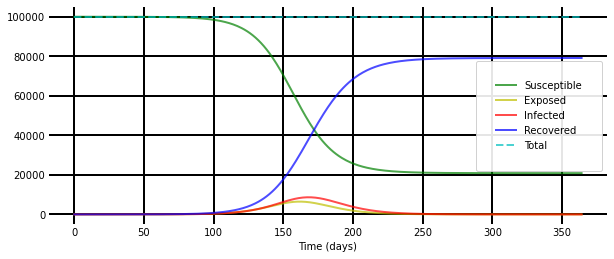

In [26]:
'''
Linear space vector of time
'''
t = np.linspace(0, 364, 365) 

y0 = S0, E0, I0, R0 # Initial conditions vector

''' 
Integrate the SIR equations over the time grid, t. 
'''
ret = odeint(diff_eq_for_exposure, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

plot_engine(t, S, E, I, R)

In [27]:
def diff_eq_dead(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D= y
    ds_dt = (-beta * I) * (S / N)
    de_dt = (beta * I * (S / N)) - (delta * E)
    di_dt = (delta * E) - (alpha * rho * I) - ((1 - alpha) * gamma * I)
    dr_dt = ((1 - alpha) * gamma * I)
    dd_dt = (alpha * rho * I)
    
    return ds_dt, de_dt, di_dt, dr_dt, dd_dt

In [29]:
'''
Here, we assume the input parameters to be generalized rather than assuming parameters for a particular region

(All the details about the parameters are given as side comments)

'''
N = 100000
D = 7.0
gamma = 1.0 / D
delta = 1.0 / 5.0  #incubation period of five days
R_0 = 1.98
beta = R_0 * gamma  
alpha = 0.13  
rho = 1/10  
S0, E0, I0, R0, D0 = N - 1, 1, 0, 0, 0  # initial conditions: one exposed


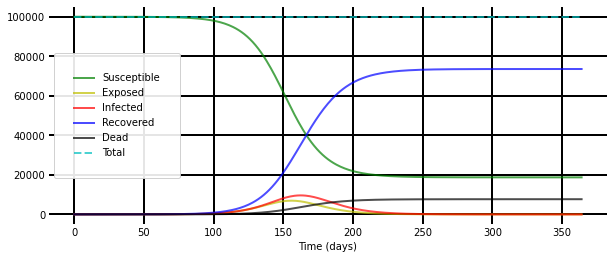

In [33]:
'''
Linear space vector of time
'''
t = np.linspace(0, 364, 365) 

y0 = S0, E0, I0, R0, D0 # Initial conditions vector

''' 
Integrate the SIR equations over the time grid, t. 
'''
ret = odeint(diff_eq_dead, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

plot_engine(t, S, E, I, R, D)

In [47]:
def diff_eq_r0_with_lock_down(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    ds_dt = (-betafoo(t) * I) * (S / N)
    de_dt = (betafoo(t) * I * (S / N)) - (delta * E)
    di_dt = (delta * E) - (alpha * rho * I) - ((1 - alpha) * gamma * I)
    dr_dt = ((1 - alpha) * gamma * I)
    dd_dt = (alpha * rho * I)
    
    return ds_dt, de_dt, di_dt, dr_dt, dd_dt


In [60]:
'''

'''
N = 100000
L = 40
D = 4.0
gamma = 1.0 / D
delta = 1.0 / 5.0  #incubation period of five days
R_0 = 5
def R0_OT(t):
    if t < L :
        return 5.0
    return 0.9

def betafoo(t):
    return R0_OT(t) * gamma

alpha = 0.2
rho = 1/9  
S0, E0, I0, R0, D0 = N - 1, 1, 0, 0, 0  # initial conditions: one exposed


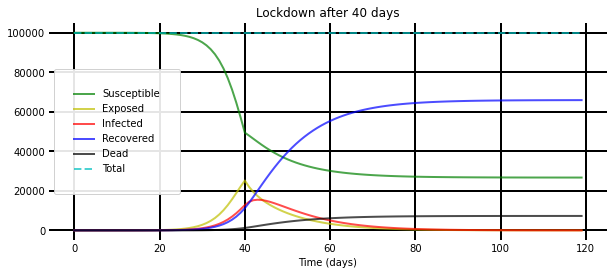

In [62]:
t = np.linspace(0, 119, 120)
y0 = S0, E0, I0, R0, D0

ret =  odeint(diff_eq_r0_with_lock_down, y0, t, args = (N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
plot_engine(t, S, E, I, R, D, L)

In [63]:

def diff_eq_r0_with_logistical_version(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D= y
    ds_dt = (-betafoo(t) * I) * (S / N)
    de_dt = (betafoo(t) * I * (S / N)) - (delta * E)
    di_dt = (delta * E) - (alpha * rho * I) - ((1 - alpha) * gamma * I)
    dr_dt = ((1 - alpha) * gamma * I)
    dd_dt = (alpha * rho * I)
    
    return ds_dt, de_dt, di_dt, dr_dt, dd_dt


In [65]:

r0_start, k, x0, r0_end = 5, 0.5, 45, 1.32

def r0_ot(t):             #takes linspace of 100
    return -1 *(r0_end - r0_start) / (1 + np.exp(-k * (-t + x0))) + r0_end

def betafoo(t):
    return r0_ot(t) * gamma



alpha = 0.2  
rho = 1/9  
S0, E0, I0, R0, D0 = N - 1, 1, 0, 0, 0  # initial conditions: one exposed


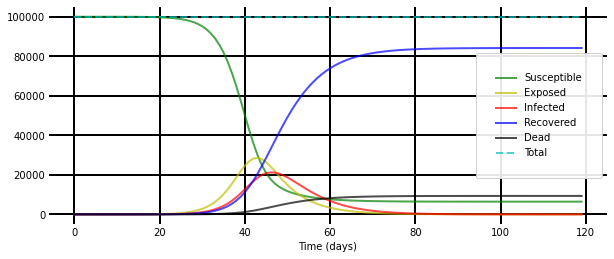

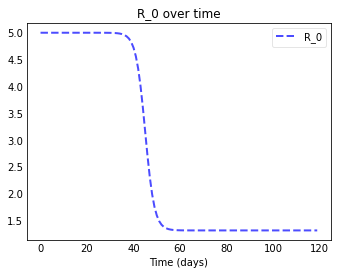

In [68]:
t = np.linspace(0, 119, 120) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(diff_eq_r0_with_logistical_version, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
ro_end = []
for i in range(len(t)):
    ro_end.append(r0_ot(i))
plot_engine(t, S, E, I, R, D, R0 = ro_end)

In [73]:

def diff_eq_r0_with_logistical_version_age(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    
    def alpha(t):
        return s * (I / N) + alpha_opt
    
    ds_dt = (-betafoo(t) * I) * (S / N)
    de_dt = (betafoo(t) * I * (S / N)) - (delta * E)
    di_dt = (delta * E) - (alpha * rho * I) - ((1 - alpha) * gamma * I)
    dr_dt = ((1 - alpha) * gamma * I)
    dd_dt = (alpha * rho * I)
    
    return ds_dt, de_dt, di_dt, dr_dt, dd_dt


In [74]:
r0_start, k, x0, r0_end = 5, 0.5, 45, 1.32

def r0_ot(t):             #takes linspace of 100
    return -1 *(r0_end - r0_start) / (1 + np.exp(-k * (-t + x0))) + r0_end

def betafoo(t):
    return r0_ot(t) * gamma

alpha_by_age = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.07, "89+": 0.13}
percent_by_age = {"0-29" : 0.5, "30-59" : 0.27, "60-89" : 0.13, "89+" : 0.1}

s = 0.01

alpha_opt = sum(alpha_by_age[i] * percent_by_age[i] for i in list(alpha_by_age.keys()))

rho = (1.0 / 9.0)

S0, E0, I0, R0, D0 = N - 1, 1, 0, 0, 0  # initial conditions: one exposed


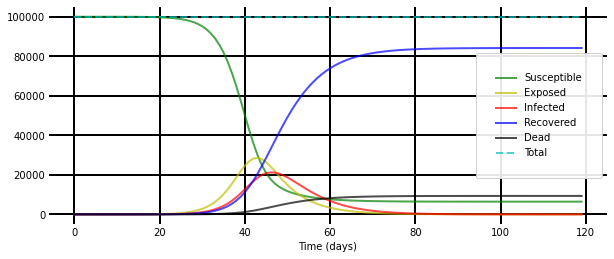

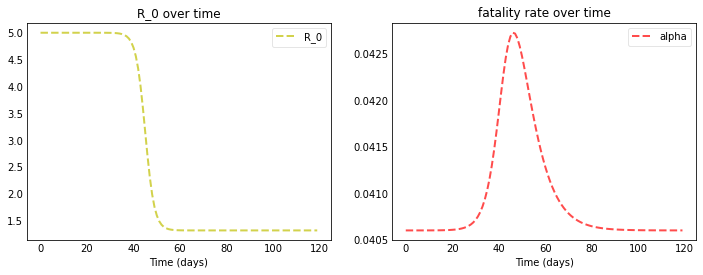

In [80]:
t = np.linspace(0, 119, 120) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(diff_eq_r0_with_logistical_version, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
ro_end = []
for i in range(len(t)):
    ro_end.append(r0_ot(i))

aot = []

for i in range(len(t)):
    aot.append(s * I[i]/N + alpha_opt)
plot_engine(t, S, E, I, R, D, R0 = ro_end, Alpha = aot)